In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = 'D:\work\Jira_analyses\out_csv.csv'

In [3]:
#load source file
users = pd.read_csv(file,
                        encoding="utf-8-sig",
                       sep=";",
                       usecols =['KEY','AUTHOR_NAME','DATE_CREATED','OLD_VALUE','NEW_VALUE'])

In [4]:
#adding end_dates column to source data frame. end dates are nothing but start_dates shifted on 1 value 
# since each new line has start date which is end date for previous status
end_dates = users['DATE_CREATED'].tolist();
end_dates.pop(0)
end_dates.append('null')
users = users.assign(END_DATES = pd.Series(end_dates))
#print(users.groupby('KEY').tail(2))

In [5]:
#set last end_date for each story as a last update date of the story
oldvalue = users.iloc[0]
for index, row in users.iterrows():
    if oldvalue.KEY != row.KEY :
        users.loc[users.index[index-1],'END_DATES'] = users.loc[users.index[index-1],'DATE_CREATED']  
    oldvalue=row
users.loc[users.index[len(users)-1],'END_DATES'] = users.loc[users.index[len(users)-1],'DATE_CREATED']    

In [6]:
#add time difference in hours
time_diff = users['END_DATES']
time = users[['DATE_CREATED','END_DATES']].apply(lambda x: datetime.strptime(x['END_DATES'],'%d.%m.%Y %H:%M:%S') - datetime.strptime(x['DATE_CREATED'],'%d.%m.%Y %H:%M:%S'), axis=1)
time_h = [a.total_seconds()/3600 for a in time]
users = users.assign(DURATION = pd.Series(time_h))

In [53]:
grouped_list = users.groupby(['OLD_VALUE'])[['DURATION']].sum().reset_index().sort_values(by=['DURATION'])
grouped_list = grouped_list[(grouped_list.OLD_VALUE != 'Rejected')\
                            & (grouped_list.OLD_VALUE != 'Done') \
                            & (grouped_list.OLD_VALUE != 'Sub-task Done')\
                            & (grouped_list.OLD_VALUE != 'IDEA - TO DO')\
                            & (grouped_list.OLD_VALUE != 'Sub-task To Be Refined')\
                            & (grouped_list.OLD_VALUE != 'In Refine')\
                            & (grouped_list.OLD_VALUE != 'To Be Refined')\
                            & (grouped_list.OLD_VALUE != 'In Progress')]

Text(0.5,1,'Total time in status (h)')

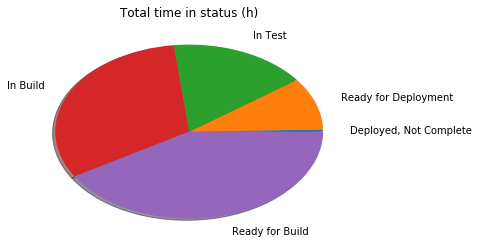

In [54]:
# pie()
plt.pie(grouped_list.DURATION, labels=grouped_list.OLD_VALUE,shadow=True,labeldistance=1.2)
#plt.pie()
plt.title('Total time in status (h)')